In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


$$Title: Predicting Corporate Fraud Risks$$

###  Background

Fraud typically involves deceptive maneuvers such as the manipulation or misrepresentation of financial data to secure unlawful gains. Companies that take unfair practices without regard for legal consequences can have a significant impact on the economy and individuals in society. To make sure that all departments are adhering to the documentation system for documenting transactions, an audit involves an auditor checking or inspecting the different books of accounts followed by a physical inspection of the inventory. This is done to evaluate the correctness of the organization's financial accounts. Internal audits and external audits are the two main divisions of audits. Employees or the leaders of certain departments may perform the audit internally, or an outside company or independent auditor may do it outside. To guarantee that the books have been closed fairly and there have been no misrepresentations or fraud, it is intended that an impartial authority review and verify the accounts. (The Economic Times) To facilitate an accurate classification, we're using the Trial dataset, which offers a rich mix of current inherent risk factors and historical control risk factors.

To create a predictor for categorizing suspicious companies, detailed one-year non-confidential data of firms from the Auditor Office of India is gathered from 2015 to 2016.  Annual data of 777 firms from 18 different sectors are collected.


This project aims to predict a firm's potential for fraudulent behavior by analyzing both current and historical risk factors. Our goal is to develop a robust model capable of distinguishing between firms likely to engage in fraudulent activity and those unlikely to do so, based on their past and present financial activities.

Fraud typically involves deceptive maneuvers such as the manipulation or misrepresentation of financial data to secure unlawful gains. To facilitate an accurate classification, we're using the Trial dataset. This is an audit dataset that contains the auditing records of 777 firms (Hooda et al., 2018). Auditing is characterized as the process through which the financial records of a business are scrutinized to confirm that their financial statements adhere to the established accounting laws and principles (Cosserat 2009), and it is thus a crucial process to discover fraudulent risk. Each of these firms contains a risk factor class that indicates whether a certain firm is fraudulent or not based on their relative present and historical risk factors (Hooda et al., 2018). These inherent risk (present) factors and historical control risk factors can potentially serve as great predictors for the final analysis of this project.

In [2]:
set.seed(168)
read_csv("https://raw.githubusercontent.com/sgvjlee23/DSCI1002023SGroup6/main/trial.csv") -> trial
trial|>
    mutate (Risk = as_factor (Risk)) -> trial

Rows: 776 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (17): Sector_score, PARA_A, SCORE_A, PARA_B, SCORE_B, TOTAL, numbers, Ma...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


We have read the dataset, "trial", from the web into R. Since the delimitter for this dataset is a comma, we have chosen the function, "read_csv", to load the dataset.

In [3]:
fraud_count <- trial |>
                group_by (Risk) |>
                summarize (count = n())
fraud_count

Risk,count
<fct>,<int>
0,290
1,486


Prior to splitting the dataset, we will first use the "group_by" and "summarize" functions to find out the proportion of the class we intend to classify so that it can allow us to make sure the same proportions will be adopted in both the training and testing datasets. And we have discovered that there are 217 firms that do not have the risk for fraudulent acts, and there are 364 firms that do. In other words, 37% of the firms are non-fraudulent, and 63% are.

Below, we have split the dataset, "trial", into a training and testing dataset. And based on the summary table above, we have set prop = 0.63 since 63% of firms in the original dataset are classified as fraudulent.

In [4]:
trial_split <- initial_split(trial, prop = 0.63, strata = Risk)
trial_train <- training(trial_split)
trial_test <- testing(trial_split) 
glimpse(trial_train)

Rows: 488
Columns: 18
$ Sector_score  <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.…
$ LOCATION_ID   <chr> "6", "6", "6", "8", "3", "4", "14", "5", "5", "5", "19",…
$ PARA_A        <dbl> 0.51, 0.00, 0.00, 0.00, 0.94, 0.00, 0.00, 0.00, 0.00, 0.…
$ SCORE_A       <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ PARA_B        <dbl> 0.23, 0.08, 0.83, 0.84, 0.01, 1.10, 1.03, 1.76, 2.97, 0.…
$ SCORE_B       <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ TOTAL         <dbl> 0.74, 0.08, 0.83, 0.84, 0.95, 1.10, 1.03, 1.76, 2.97, 0.…
$ numbers       <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ Marks         <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ Money_Value   <dbl> 0.000, 0.000, 2.950, 0.007, 0.100, 0.007, 0.000, 1.080, …
$ MONEY_Marks   <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ District      <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ Loss          <d

Based on this glimpse shot of the training dataset, it seems that it is already in a tidy format, and thus, the steps for cleaning and wrangling are unnecessary.

Prior to performing the actual data analysis, we will establish two tuning specifications to identify the best K for optimal analysis and to discover which predictors will be the most effective in classifying the fraudulent risk factors of firms accurately. For the first tuning specification, we have selected the inherent risk factors as predictors. And for the second one, we have selected control risk factors.

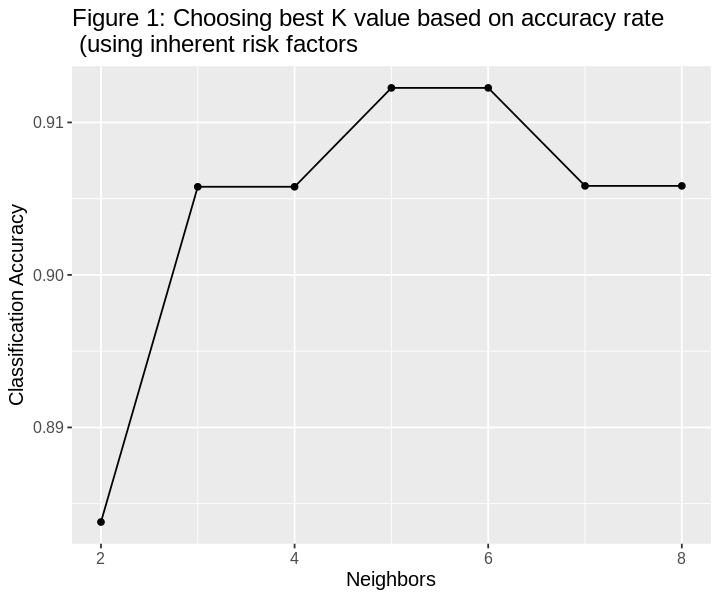

In [5]:
set.seed (1000)
options(repr.plot.height = 5, repr.plot.width = 6)
if(any(is.na(trial)))
  trial <- na.omit(trial) 

training_recipe <- recipe (Risk ~ PARA_A + PARA_B + TOTAL + Money_Value, data = trial_train) |>
                    step_naomit(all_predictors()) |>  # Additional step to remove NA values
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

training_vfold <- vfold_cv(trial, v = 5, strata = Risk)

k_values <- tibble(neighbors = 2:8)

knn_results <- workflow() |>
                add_recipe(training_recipe) |>
                add_model(knn_tune) |>
                tune_grid(resamples = training_vfold, grid = k_values) |>
                collect_metrics()

accuracies <- knn_results |>
                filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean, group = .metric)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", y = "Classification Accuracy") +
                    theme(text = element_text(size = 12))+
                    ggtitle ("Figure 1: Choosing best K value based on accuracy rate \n (using inherent risk factors")

cross_val_plot

For the tuning specification for inherent risk factors, data standardization forms the first step of our analysis. This ensures fairness and uniformity by aligning all variables to a comparable scale. Following this, we create a classification recipe, a preparatory step that outlines how we'll transform the data for modeling.

Subsequently, we establish a tuning specification to identify the optimal number of K-neighbors for our K-nearest neighbors (KNN) model, followed by the setting up of a 5-fold cross-validation process. This division of the dataset into five subsets helps us to independently train and test the model, improving its reliability and minimizing dependency on any particular data partition.

Next, we construct a KNN model specification fitted to the training data, which enables us to generate predictions based on established relationships within the dataset. We encapsulate our recipe, model specification, and cross-validation process into a tuning workflow, iteratively refining our model. Upon its completion, we collect all performance metrics to assess the model's accuracy.

Finally, we graphically represent the relationship between the model's accuracy rate and the number of K-neighbors using a combination of point and scatter plots. This visualization assists us in identifying the most effective K value: 5, since adjusting the value to a nearby one does not significantly diminish the model's accuracy, which ensures our selection is dependable amidst uncertainty. Moreover, the computational cost of training this dataset is not prohibitive. However, one thing to note is that one nearby K, 4, has a lower accuracy rate relative to 3 and 6, this suggests that there might be a tie where the algorithm won't be able to make a decisive prediction because each class has equal votes.

On the other hand, based on the above visualization, we conclude that all predictors used in this tuning specification are necessary to produce accurate results for the final data analysis, as it has allowed us to pick the best k.

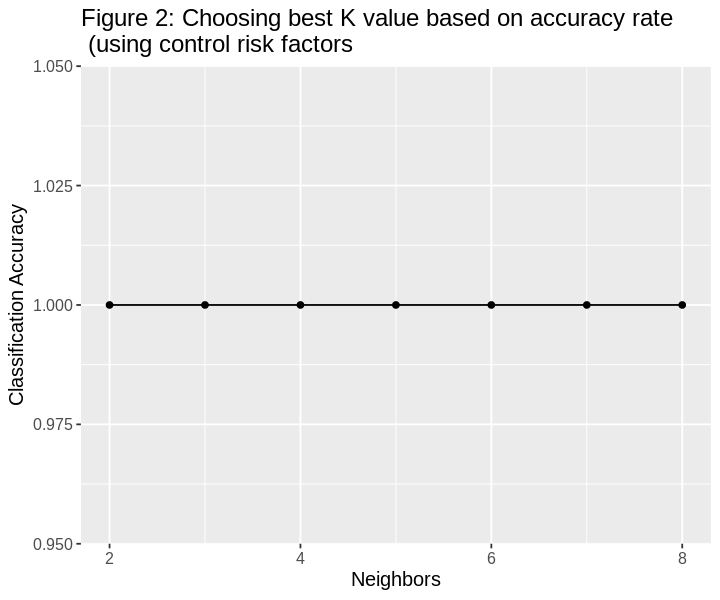

In [6]:
set.seed (99)
options(repr.plot.height = 5, repr.plot.width = 6)

training_recipe2 <- recipe (Risk ~ Score + History_score, data = trial_train)|>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

knn_tune2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

training_vfold2 <- vfold_cv(trial, v = 5, strata = Risk)

k_values2 <- tibble(neighbors = 2:8)
knn_results2 <- workflow() |>
                add_recipe(training_recipe2) |>
                add_model(knn_tune2) |>
                tune_grid(resamples = training_vfold2, grid = k_values) |>
                collect_metrics()

accuracies2 <- knn_results2 |>
                filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies2, aes(x = neighbors, y = mean, group = .metric)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", y = "Classification Accuracy") +
                    theme(text = element_text(size = 12)) +
                    ggtitle ("Figure 2: Choosing best K value based on accuracy rate \n (using control risk factors")
                    
cross_val_plot

The above visualization is the result of our second tuning specification. While it has seemingly produced a result that has a 100% accuracy rate in classification, we have decided not to utilize any of these predictors as they reflect outcomes that are derived from data previously processed by others (Hooda et al., 2018). Therefore, while employing these predictors would result in perfect accuracy, we ultimately lack the mathematical model that can allow us to reproduce the results, making these data unusable in our final data analysis.

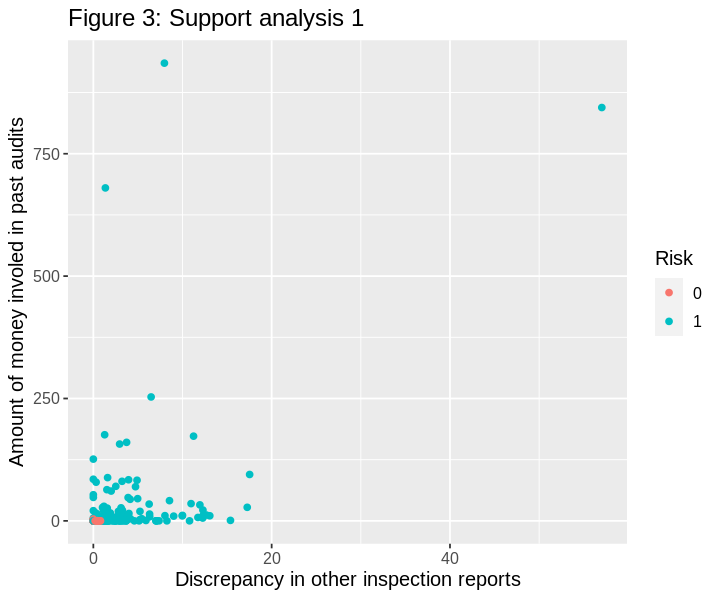

In [7]:
set.seed (121)
options(repr.plot.height = 5, repr.plot.width = 6)
predictors_comparison <- ggplot(trial_test, aes(x = PARA_A, y = Money_Value, color = Risk)) +
                    geom_point() +
                    labs(x = "Discrepancy in other inspection reports", y = "Amount of money involed in past audits", color = "Risk") +
                    theme(text = element_text(size = 12))+
                    ggtitle ("Figure 3: Support analysis 1")
predictors_comparison

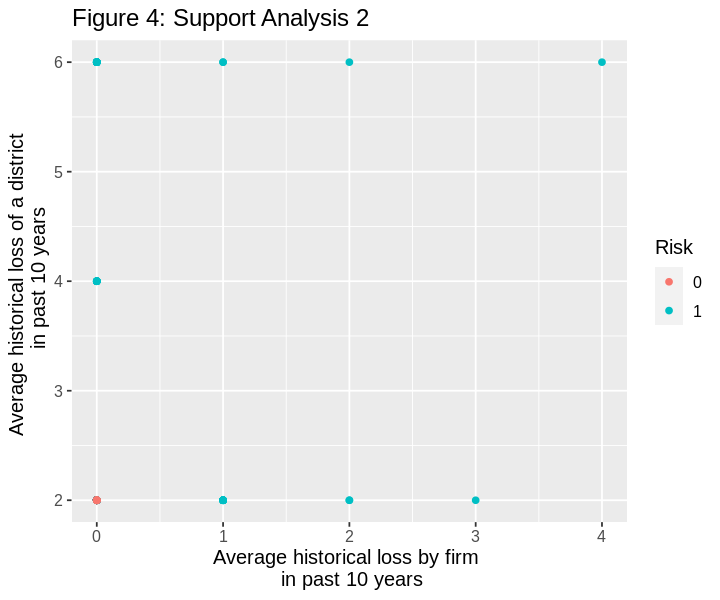

In [8]:
set.seed (131)
options(repr.plot.height = 5, repr.plot.width = 6)
predictors_comparison2 <- ggplot(trial_test, aes(x = History, y = District, color = Risk)) +
                    geom_point() +
                    labs(x = "Average historical loss by firm \n in past 10 years", y = "Average historical loss of a district \n in past 10 years", color = "Risk") +
                    theme(text = element_text(size = 12))+
                    ggtitle ("Figure 4: Support Analysis 2")
predictors_comparison2

The above two plots are created as support analysis to further present the unusability of control risk factors variables in our final data analysis, as only the use of inherent risk factors to visualize a relationship.

Therefore, based on the above plots, the predictors we have selected for the final data analysis are:"PARA_A," which measures the extent of manipulation or misrepresentation in financial planning, "PARA_B," which offers insights into unexpected or irregular financial activities, "TOTAL," indicating the overall level of financial irregularities found during audits, and "Money_Value," which quantifies financial discrepancies and may identify suspicious transactions. This decision is made based on both the lack of access to the data of Hooda et al (2018) to re-process all the control risk factor variables and the superior efficacy of the inherent risk factors in plotting graphs and determining the true average accuracy value behind the K-neighbors. Furthermore, these variables exhibit no overlapping cell values when compared to all others, promoting a clearer visualization and enhancing model reliability.

          Truth
Prediction   0   1
         0 101  19
         1   7 161

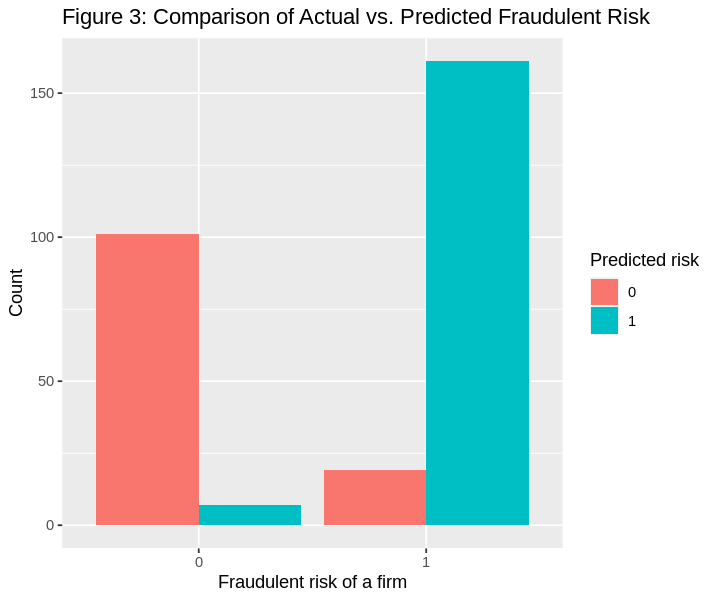

In [9]:
set.seed (199)
training_recipe <- recipe (Risk ~ PARA_A + PARA_B + TOTAL + Money_Value, data = trial_train) |>
                    step_naomit(all_predictors()) |>  # Additional step to remove NA values
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit <- workflow() |>
                add_recipe(training_recipe) |>
                add_model(knn_spec) |>
                fit (data = trial_train)

trial_test_predictions <- predict (knn_fit, trial_test)|>
                        bind_cols (trial_test)

trial_metrics <- trial_test_predictions |>
                metrics (truth = Risk, estimate = .pred_class) |>
                filter (.metric == "accuracy")

trial_conf_mat <- trial_test_predictions |>
                    conf_mat (truth = Risk, estimate = .pred_class)

trial_test_plot <- trial_test_predictions|>
                    ggplot(aes(x = Risk, fill = .pred_class)) +
                    geom_bar(position = 'dodge') +
                    labs(x = "Fraudulent risk of a firm", 
                         y = "Count", 
                         fill = "Predicted risk") +
                    ggtitle("Figure 3: Comparison of Actual vs. Predicted Fraudulent Risk")

trial_conf_mat
trial_test_plot

### Discussion:

Our primary objective is to develop a robust data science model capable of distinguishing businesses likely to engage in fraudulent activities from those that are not. This classification is based on the analysis of past and current financial activities of 288 firms form our testing set. By training a K-Nearest Neighbors (KNN) model using these predictor variables, we can gain valuable insights into identifying potential fraud and classifying companies according to their risk levels.

The results of our final analysis have indicated an accuracy rate of 90.9% of in classifying the fradulent risk of 288 firms. This percentage can be calculated by adding the number of true positives (161) and true negatives (101) and dividing it by the total number of instances (288). In this case, the accuracy is (161 + 101) / 288 = 0.909, or 90.9%. This result is slightly not what we expect to find, as the plot from above indicate that with using 5 as our most effective k value would assist our model to reach an accuracy rate above 91%. The reason behind this differnce could be numerous, such as outliers in our predictors or even other unknown factors in the original dataset. Regardless, 90.9% is an acceptable result. 

These conclusions have the potential to boost fraud prevention strategies, improve risk assessment and audit procedures, and have an impact on the legal and regulatory environment. These discoveries strengthen the financial system, increase openness, and strengthen defences against fraud, which benefits businesses and the economy as a whole. However, since our model has an accuracy rate of 90.9%, we will still have to consider the negative impacts that could potentinally derive from the other 10.9% of firms that will not be classified correctly.

Our findings prompt future questions, such as 
- what preventive measures can be instituted to lessen interaction risks with fraudulent firms
- how fraud risks may vary across different locations or industry sectors.


### References:

Cosserat, G. 2009. Accepting the engagement and planning the audit. In Modern auditing, ed.
G. Cosserat and N. Rodda, 3rd ed., 734–36. John Wiley & Sons.

The Economic Times. (n.d.). What is audit? definition of audit, audit meaning. https://economictimes.indiatimes.com/definition/audit

Hooda, N., Bawa, S., &amp; Rana, P. S. (2018). Fraudulent firm classification: A case study of an external audit. Applied Artificial Intelligence, 32(1), 48–64. https://doi.org/10.1080/08839514.2018.1451032